In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

iris = datasets.load_iris()
train_x, test_x, train_y, test_y = train_test_split(iris.data,iris.target, test_size = 0.25 , random_state = 2019)
clf = GradientBoostingClassifier()
clf.fit(train_x,train_y)
pred = clf.predict(test_x)

print(f'Accuracy : {metrics.accuracy_score(pred,test_y)}')

Accuracy : 0.9736842105263158


# 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用手寫辨識資料集，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [2]:
#load the digit data
digits = datasets.load_digits()

#put the data into dataframe(easy to operate)
train_df = pd.DataFrame(digits.data)
train_label = np.array(digits.target, dtype = np.int)

#Check the data shape
print(f'Input data shape : {train_df.shape}')
print(f'Input label shape : {train_label.shape}')

Input data shape : (1797, 64)
Input label shape : (1797,)


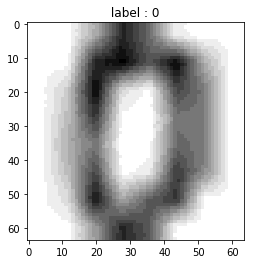

In [3]:
#check the image
img = np.asarray(train_df.iloc[0], dtype = np.uint8).reshape(8,8)
#Since the image is too small(8x8), so I resize to 64x64 for easy visualization
img = cv2.resize(img,(64,64),0)

plt.imshow(img,cmap = plt.cm.binary)
plt.title(f' label : {train_label[0]} ')
plt.show()

In [4]:
#Split the train and test dataset for model validation
train_x, test_x, train_y, test_y = train_test_split(train_df,train_label, test_size = 0.25, random_state = 2019)
clf.fit(train_x, train_y)
pred = clf.predict(test_x)

print(f'Digits predict accuracy : {metrics.accuracy_score(pred,test_y)}')

Digits predict accuracy : 0.9644444444444444


In [7]:
#Tune some parameters of GBC
clf.set_params(n_estimators = 200, max_depth = 3)
clf.fit(train_x,train_y)
pred = clf.predict(test_x)

print(f'Digits predict accuracy : {metrics.accuracy_score(pred,test_y)}')

Digits predict accuracy : 0.9622222222222222


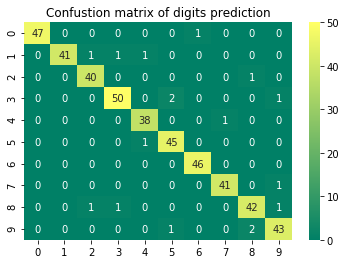

In [8]:
#Check the confusion matrix
conMat = confusion_matrix(pred, test_y)
sns.heatmap(conMat, cmap = plt.cm.summer , annot = True)
plt.title("Confustion matrix of digits prediction")
plt.show()

**5 & 3 , 8 & 0 seems have slightly higher chance to be mis-classify**

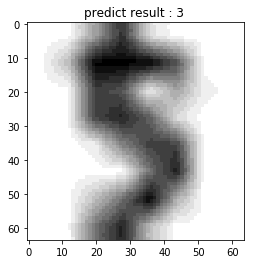

In [11]:
#Check the wrong prediction image
pred = pd.Series(pred)
test_y = pd.Series(test_y)

wrong_pred_idx = pred[pred != test_y].index.values

pred_img = np.asarray(test_x.iloc[wrong_pred_idx[0]], dtype = np.uint8).reshape(8,8)
pred_img = cv2.resize(pred_img,(64,64),0)

plt.imshow(pred_img, cmap = plt.cm.binary)
plt.title(f'predict result : {pred.iloc[wrong_pred_idx[0]]} ')
plt.show()